<a href="https://colab.research.google.com/github/Blackstocks/GenAI/blob/main/Multimodal_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.1/526.1 kB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 129.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 75.8 MB/s eta 0:00:00


In [2]:
! sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,729 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,387 kB]
Get:13 http://archiv

In [3]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 89 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (182 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126102 

In [4]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev tesseract-ocr-eng tesseract-ocr-script-latn
!pip install Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
The following additional packages will be installed:
  libarchive-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr-script-latn
0 upgraded, 4 newly installed, 0 to remove and 89 not upgraded.
Need to get 34.6 MB of archives.
After this operation, 105 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.4 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com

In [5]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

  Preparing metadata (setup.py) ... done
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp311-cp311-linux_x86_64.whl size=179094 sha256=d954fd9c6be5a1d3916b5abb74631becdbf0af9c34ffc1c3a463a7020633e418
  Stored in directory: /root/.cache/pip/wheels/90/83/3c/d2b68d844d169d6015fc2ad8c93207d778829c87e26c6f2206
Successfully built tesseract-ocr


In [6]:
!pip install pytesseract

In [7]:
from unstructured.partition.pdf import partition_pdf

In [8]:
raw_pdf_elements = partition_pdf(
    filename="/content/bitsat.pdf",
    strategy="hi_res",
    extract_images_in_pdf=True,
    extract_images_block_types=["Images","Table"],
    extract_images_block_to_payload=False,
    extract_images_block_output_dir="extracted_data"
)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [9]:
raw_pdf_elements

In [10]:
Header = []
Footer = []
Title = []
NarrativeText = []
Text = []
ListItem = []
Formula = []

for elements in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(elements)):
    Header.append(str(elements))
  elif "unstructured.documents.elements.Footer" in str(type(elements)):
    Footer.append(str(elements))
  elif "unstructured.documents.elements.Title" in str(type(elements)):
    Title.append(str(elements))
  elif "unstructured.documents.elements.NarrativeText" in  str(type(elements)):
    NarrativeText.append(str(elements))
  elif "unstructured.documents.elements.Text" in str(type(elements)):
    Text.append(str(elements))
  elif "unstructured.documents.elements.ListItem" in str(type(elements)):
    ListItem.append(str(elements))
  elif "unstructured.documents.elements.Formula" in str(type(elements)):
    Formula.append(str(elements))

In [11]:
Formula

['(a) p ( m 0 d 2 id + x 2 ) (b) p ( m 0 ix d 2 - x 2 ) (c) ( d m 2 0 ix + x 2 ) (d) ( d m 2 0 id + x 2 )',
 '(a) 6 2 (b) 24 (c) 3 (d) 3 2',
 '(a) 2p 2 2 2 nma (b) p 2 2 2 nma (c) 1 4 2 2 nma (d) 4p 2 2 2 nma',
 '(a) (b) - 4Rq ˆi p 4Rq ˆi p –q – – – – – – – + + R + q + + + X (c) - 2Rq ˆi p (d) 2Rq ˆi p',
 '(a) C g (b) C P (c) PCg (d) g',
 '(a) 3 2 (b) 4 2 (c) 5 2 (d)7',
 '(a) Bwl 2 (b) 1 2 Bwl 2',
 '(a) 1.0 M (b) 1.5 M',
 '35 333 R log e 2.1 10 ´ 1.5 10 ´ –2 –2 298 333 ´ 35 R log e 21 1.5 298 333 ´ 35 R log e 2.1 298 333 ´ 35 R log e 2.1 1.5',
 '(a) log x m = log p + 1 n log K',
 '(i) ( ) CO g + ( 2H g 2 ) Cu/ZnO Cr O - 2 3 ¾¾¾¾¾¾¾® ( CH OH g 3 (ii) ( ) ( ) CO g H g + 2 Cu ¾¾® ( ) HCHO g',
 '(iii) ( ) CO g + ( 3H g 2 ) Ni ¾¾® ) ( ( CH g H O g + 4 2 )',
 '(a) 6])CN(Co[ -3 (b) 6])CN(Fe[ -3 (c) 6])CN(Mn[ -3 (d) [ 6])CN(Cr -3',
 'and tan A 1 = 2 3 , tan B 2 = 2 3 . Then tan C 2 is equal',
 '(a) ,5 - ,4 51 ± 2 - 3 (b) - ,4,5 ±- 51 2 - 3 (c) ,4,5 ±- 51 2 - 3 (d) - ,5 - ,4 51 ± 2 - 3',
 '117.

In [12]:
ListItem

['1. Four point charges –Q, –q, 2q and 2Q are placed, one at each corner of the square. The relation between Q and q for which the potential at the centre of the square is zero is :',
 '2. Two long parallel wires carry equal current i flowing in the same direction are at a distance 2d apart. The magnetic field B at a point lying on the perpendicular line joining the wires and at a distance x from the midpoint is –',
 '3. In the circuit shown, the symbols have their usual meanings. The cell has emf E. X is initially joined to Y for a long time. Then, X is joined to Z. The maximum charge on C at any later time will be',
 '4. A point object O is placed in front of a glass rod having spherical end of radius of curvature 30 cm. The image would be formed at',
 '(a) 30 cm left (b) infinity',
 '(c) 1 cm to the right (d) 18 cm to the left',
 'In Young’s double slit experiment, l = 500nm, d = 1mm, D = 1m. Minimum distance from the central maximum for which intensity is half of the maximum intens

In [13]:
# collecting the raw images from the pdf
img = []
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
    img.append(str(element))

In [14]:
img

['',
 'L  R  +     –  Y  C  Z  X  E  R LC  (b)  2  ER  LC  E LC  (d)  E LC ',
 '',
 '',
 '',
 '',
 '2V  A  (a) 1/10 A  (b) 3/10 A  (c) 4/10 A  (d) 7/10 A. ',
 '(a)  O  T  (b)  O  (c)  (d)   O  T  O  T  T ',
 '',
 '',
 '',
 'CH CH2  3 KMnO4  ¾¾¾®  KOH  Br2  B ¾¾®  FeCl3  C H OH  2 5  C ¾¾¾®D  H+  (a)  CH2  – CH – COOC H     2  5  Br ',
 '',
 'COOH  OCH CH2 ',
 'COOC H2 5  (d)  Br ',
 '[B]  [A] ',
 '',
 '',
 '',
 '',
 '#  @  @  (a)  (b) #  (c)  @#  (d) ',
 '(a)  (b)  (c)  (d) ',
 '2  3  9  1  41  5  4  159  6  4  ?  8  3  2  3  (a) 888  (b) 788  (c) 848  (d)842 ',
 '?  (a)  (b)  (c)  (d)  MATHEMATICS ',
 '',
 '',
 '',
 '',
 '']

In [15]:
!pip install langchain_core

In [16]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 6.1 MB/s eta 0:00:00


In [17]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [18]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
# from langchain_openai import ChatOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI

In [19]:
#writing prompt to get summary from table[data] handleing

In [20]:
prompt_text = """You are an assistant tasked with the summarizing tables for retrival. \
              These summaries will be embedded and used to retrieve the raw table elements.\
              Give a concise summary of the table that is well optimized for retrieval. Table {element}"""

In [21]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [22]:
import os
from google.colab import userdata
GEMINI_API_TOKEN = userdata.get('GOOGLE_API_KEY')
os.environ['GOOGLE_API_KEY'] = GEMINI_API_TOKEN

In [23]:
#text summary chain
model = ChatGoogleGenerativeAI(temperature=0, model="gemini-pro")

In [24]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [25]:
import base64
import os
from langchain_core.messages import HumanMessage

In [26]:
def encode_image(image_path):
  """Getting the base64 string"""
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [27]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

    content = [
        {"type": "text", "text": prompt},
        {"type": "image_url", "image_url": f"data:image/jpeg;base64,{img_base64}"}
    ]

    msg = model.invoke(
        [{"role": "user", "content": content}]
    )

    return msg.content

In [28]:
def generate_img_summaries(path):
  """Generates summaries and base64 encoded strings for images
  path: Path to list of .jpg files extracted by unstructured module"""

  # First store base64 encoded image
  img_base64_list = []

  # Store image summaries then
  image_summaries = []

  # Prompt
  prompt = """You are an assistent tasked with summarizing images for retrival. \
  These summaries will be embedded and used to retrieve raw image. \
  Give a concise summary of the image that is well optimized for retrival"""

  base64_image = encode_image(path)
  img_base64_list.append(base64_image)
  image_summaries.append(image_summarize(base64_image,prompt))

  return img_base64_list, image_summaries


In [29]:
fpath = "/content/figures/figure-5-12.jpg"

In [30]:
img_base64_list,image_summaries=generate_img_summaries(fpath)

In [31]:
image_summaries

['Chemical reaction scheme showing ethylbenzene undergoing oxidation with KMnO4/KOH, followed by bromination with Br2/FeCl3.  A second reaction shows an esterification.  The final product is a brominated ethylbenzene ester.']

In [32]:
!pip install langchain_core
!pip install langchain_google_genai
!pip install langchain
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.0 MB/s e

In [33]:
print(NarrativeText)

['1.66 , then the gas may be', '[Given specific heat of water is 4.2 kJ/kg]', '20°C then what will be the number of beats produced per second by these waves, when the speed of sound at 0°C is 332 m/s?', 'The third order bright fringe is', '(d) NO2 + NH2 = 1 mole', 'if equilibrium pressure is 3X bar then DrG° would be', 'the same time N2O3 also decomposes as :', '4.0 moles of N2O5 are taken in 1.0 litre flask and allowed to dissociate. Concentration of O2 at equilibrium is 2.5 M. Equilibrium concentration', 'of N2O5 is :', '(B) HOCl + H2O2 ® H3O+ + Cl– + O2 Which of the following statements is correct about H2O2 with reference to these reactions? Hydrogen peroxide is ______ .', '(b) Be(OH)2 like Al(OH)3 is basic.', '(c) Be like Al is rendered passive by HNO3.', 'Times —>', 'log—=logK +—lo logs logp ~ S|', 'Here [Y] is a', 'Which of the above compound(s), on being', 'warmed with iodine solution and NaOH, will give iodoform?', '(CH3)2CH-OH (1), (CH3)3C-OH (2), (C6H5)3C- OH (3)', '(c) Glob

## **Text Summary**

In [34]:
# prompt
prompt_text = """You are an assistant tasked with the summarizing text for retrival. \
              These summaries will be embedded and used to retrieve the raw table elements.\
              Give a concise summary of the table or text that is well optimized for retrieval.text:{element}"""

In [35]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [36]:
# text summary chain
model = ChatGoogleGenerativeAI(temperature=0, model="gemini-1.5-flash")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [37]:
# initializing empty summaries
text_summaries = []

In [38]:
text_summaries = summarize_chain.batch(NarrativeText,{"max_concurrency":5})

  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 2
}
].
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 2
}
].
  quota_metric: "generativelanguage.googleapis.com/generate_co

ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
}
]

In [39]:
print(NarrativeText)

['1.66 , then the gas may be', '[Given specific heat of water is 4.2 kJ/kg]', '20°C then what will be the number of beats produced per second by these waves, when the speed of sound at 0°C is 332 m/s?', 'The third order bright fringe is', '(d) NO2 + NH2 = 1 mole', 'if equilibrium pressure is 3X bar then DrG° would be', 'the same time N2O3 also decomposes as :', '4.0 moles of N2O5 are taken in 1.0 litre flask and allowed to dissociate. Concentration of O2 at equilibrium is 2.5 M. Equilibrium concentration', 'of N2O5 is :', '(B) HOCl + H2O2 ® H3O+ + Cl– + O2 Which of the following statements is correct about H2O2 with reference to these reactions? Hydrogen peroxide is ______ .', '(b) Be(OH)2 like Al(OH)3 is basic.', '(c) Be like Al is rendered passive by HNO3.', 'Times —>', 'log—=logK +—lo logs logp ~ S|', 'Here [Y] is a', 'Which of the above compound(s), on being', 'warmed with iodine solution and NaOH, will give iodoform?', '(CH3)2CH-OH (1), (CH3)3C-OH (2), (C6H5)3C- OH (3)', '(c) Glob

In [40]:
text_summaries

[]

In [41]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.5 MB/s eta 0:00:00


In [42]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [43]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, image_summaries, images):
    """Creating retriever that indexes summaries, but returns raw images or text"""

    # initializing the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )

    # helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]

        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # adding text, table, images
    # checking that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)

    # checking that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever

# Create the vectorstore with Google embeddings
vectorstore = Chroma(
    collection_name="mm_rag",
    embedding_function=GoogleGenerativeAIEmbeddings(model="models/embedding-001")
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore, text_summaries, NarrativeText, image_summaries, img_base64_list)

<ipython-input-43-83a495c407ce>:39: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


In [44]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7cd57d07ee10>, docstore=<langchain_core.stores.InMemoryStore object at 0x7cd54ee6cc90>, search_kwargs={})

In [45]:
import io
import re

from IPython.display import display, Image, HTML
from PIL import Image as PILImage

In [47]:
def plt_img_base64(img_base64):
  """Display base64 encoded string as image"""
  # create an html img tag with the base64 string as the source
  image_html = f'<img src="data:image/jpeg;base64,{img_base64}"/>'
  display(HTML(image_html))


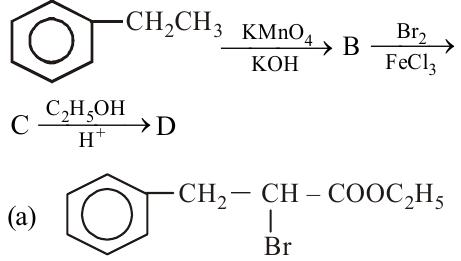

In [52]:
plt_img_base64(img_base64_list[0])

In [53]:
image_summaries[0]

'Chemical reaction scheme showing ethylbenzene undergoing oxidation with KMnO4/KOH, followed by bromination with Br2/FeCl3.  A second reaction shows an esterification.  The final product is a brominated ethylbenzene ester.'

In [54]:
def looks_like_base64(sb):
  """checking if the string looks like base64"""
  return re.match("^[A-Za-z0-9+/]+[=]{0,2}$",sb) is not None

In [56]:
from pickle import FALSE
def is_image_data(b64data):
  """checking if the base64 data is an image by looking at the start of the data"""
  image_signatures = {
      b"\xFF\xD8\xFF": "jpg",
      b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
      b"\x47\x49\x46\x38\x39\x61": "gif",
      b"\x52\x49\x46\x46": "webp",
  }
  try:
    header = base64.b64decode(b64data)[:8] # decoding and geting first 8 bytes
    for sig, format in image_signatures.items():
      if header.startswith(sig):
        return True
    return False
  except Exception:
    return False

In [71]:
import base64
import io
from PIL import Image

def resize_base64_image(base64_string, size=(128, 128)):
    """Resizing an image encoded as a base64 string"""
    # Decoding the base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resizing the image
    resized_img = img.resize(size)

    # Saving the resized image
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # encoding the resized image to base64
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

In [59]:
def split_image_text_types(docs):
  """Spliting base64-encoded images and texts"""

  b64_images = []
  texts = []
  for doc in docs:
    # checking if the document is of type Document and extracted pae_content if so
    if isinstance(doc, Document):
      doc = doc.page_content
    if looks_like_base64(doc) and is_image_data(doc):
      doc = resize_base64_image(doc, size=(1300, 600))
      b64_images.append(doc)
    else:
      texts.append(doc)
  print(b64_images)
  print(texts)

  return {"image": b64_images, "texts":texts}

In [63]:
def img_prompt_func(data_dict):
  """Joining the context into the single string"""
  # print(data_dict)
  formatted_texts = "\n".join(data_dict["context"]["texts"])
  messages = []

  # adding images(s) to the message if present
  if data_dict["context"]["image"]:
    for image in data_dict["context"]["image"]:
      image_message = {
          "type": "image_url",
          "image_url": f"data:image/jpeg;base64,{image}"
      }
      messages.append(image_message)

  # adding the text from the analysis
  text_message = {
      "type": "text",
      "text": (
          "You are a helpful assistant.\n"
          "You will be given a mixed info(s) .\n"
          "Use this information to provide relevent information to the user question .\n"
          f"User-provided question:{data_dict['question']}\n\n"
          "Text and / or images / or tables:\n"
          f"{formatted_texts}"
      ),
  }
  messages.append(text_message)
  return [HumanMessage(content=messages)]

In [64]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

In [66]:
def multi_modal_rag_chain(retriever):
   """Multi-Modal RAG chain"""

   # multi-modal LLM
   model = ChatGoogleGenerativeAI(temperature=0, model="gemini-1.5-flash")

   # RAG pipeline
   chain = (
       {
           "context": retriever | RunnableLambda(split_image_text_types),
           "question": RunnablePassthrough(),
       }
       | RunnableLambda(img_prompt_func)
       | model
       | StrOutputParser()
   )
   return chain

In [67]:
# creating rag chain
chain_multimodal_reg = multi_modal_rag_chain(retriever_multi_vector_img)

In [68]:
chain_multimodal_reg

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7cd57d07ee10>, docstore=<langchain_core.stores.InMemoryStore object at 0x7cd54ee6cc90>, search_kwargs={})
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), temperature=0.0, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7cd542ed0b10>, default_metadata=(), model_kwargs={})
| StrOutputParser()

## ***Check***

In [ ]:
# checking retrival
query = " "
docs = retriever_multi_vector_img.invoke(query)

In [ ]:
docs

In [ ]:
query = " "

In [ ]:
docs = retriever_multi_vector_img.invoke(query)

In [ ]:
docs

In [ ]:
query = " "

In [ ]:
retriever_multi_vector_img.invoke(query)

In [ ]:
plt_img_base64(docs)

## **RAG**

In [74]:
query = " what type of chemical reaction is being there"

In [75]:
chain_multimodal_reg.invoke(query)

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAJYBRQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKj3/vCu0/WpKaR82c/hQAnOfmYYpSOPlPNNZkUZkZVHqTiuX174h+H/DwIu7sZA6JzQB1QB/xrL1TxHpGjIzX1/DCQPus2Ca8I8TfHHU9QaSDR7dY4uiyqx3EVw6WHi3xldA+VLdsx/

"The image shows a series of chemical reactions. Let's break them down:\n\n**Reaction 1:** Ethylbenzene (the initial compound) undergoes oxidation with KMnO4 in KOH. This is an **oxidation reaction**, specifically a strong oxidation that cleaves the carbon-carbon bond adjacent to the benzene ring, resulting in the formation of benzoic acid (compound B).\n\n**Reaction 2:** Benzoic acid (B) reacts with Br2 in the presence of FeCl3. This is an **electrophilic aromatic substitution reaction**.  FeCl3 acts as a Lewis acid catalyst, facilitating the bromination of the benzene ring.  The product is bromobenzoic acid.\n\n**Reaction 3:**  This shows the esterification of an alcohol (C) with a carboxylic acid.  The reaction of C (presumably an alcohol) with C2H5OH in the presence of H+ is an **esterification reaction**.  The alcohol and carboxylic acid react to form an ester (D).\n\n**Reaction 4:** The final structure (a) shows the product of the previous reactions.  It's a bromobenzoic acid est